# predict if the shipments are or will reach on time or not.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ship= pd.read_csv("/Users/shaguftajahan/Downloads/shipments.csv")
ship

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
#making a copy of the original data
ship1 = ship.copy()
ship1

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Data inspection

In [ ]:
ship1.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
ship1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#Finding duplicate rows and removing them
ship1[ship1.duplicated()].count()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
#no duplicate rows

In [ ]:
#check for missing values
ship1.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

#### No missing values but we have some outliers in Prior_purchases,Discount_offered we treat them later

### Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


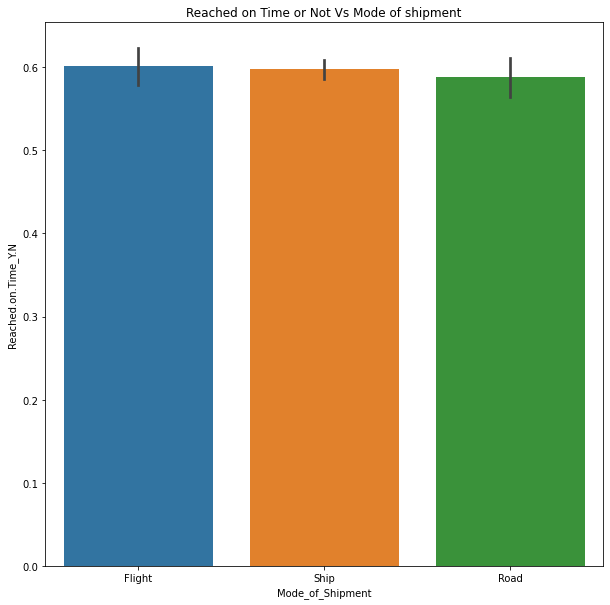

In [ ]:
plt.figure(figsize=[10,10])
sns.barplot(ship1['Mode_of_Shipment'],ship1['Reached.on.Time_Y.N'])
plt.title('Reached on Time or Not Vs Mode of shipment')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


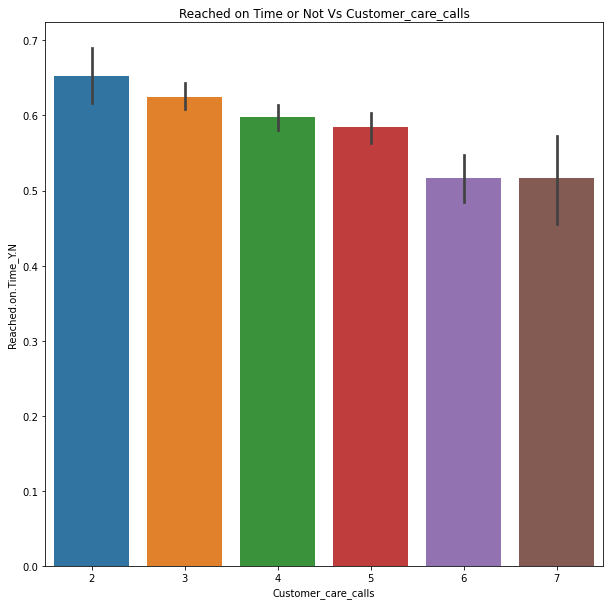

In [ ]:
plt.figure(figsize=[10,10])
sns.barplot(ship1['Customer_care_calls'],ship1['Reached.on.Time_Y.N'])
plt.title('Reached on Time or Not Vs Customer_care_calls')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


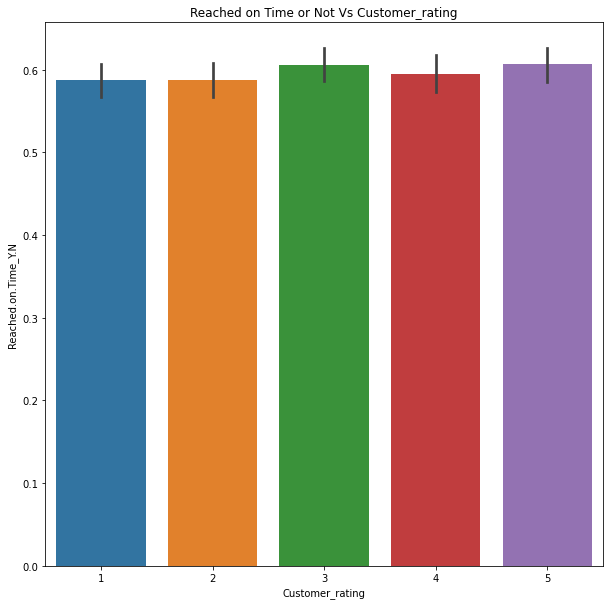

In [ ]:
plt.figure(figsize=[10,10])
sns.barplot(ship1['Customer_rating'],ship1['Reached.on.Time_Y.N'])
plt.title('Reached on Time or Not Vs Customer_rating')
plt.show()

In [ ]:
ship1=ship1.drop(['ID'],axis=1)
ship1

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
#outlier detection for numerical data
num_columns = ship1.select_dtypes(exclude='object').columns.tolist()

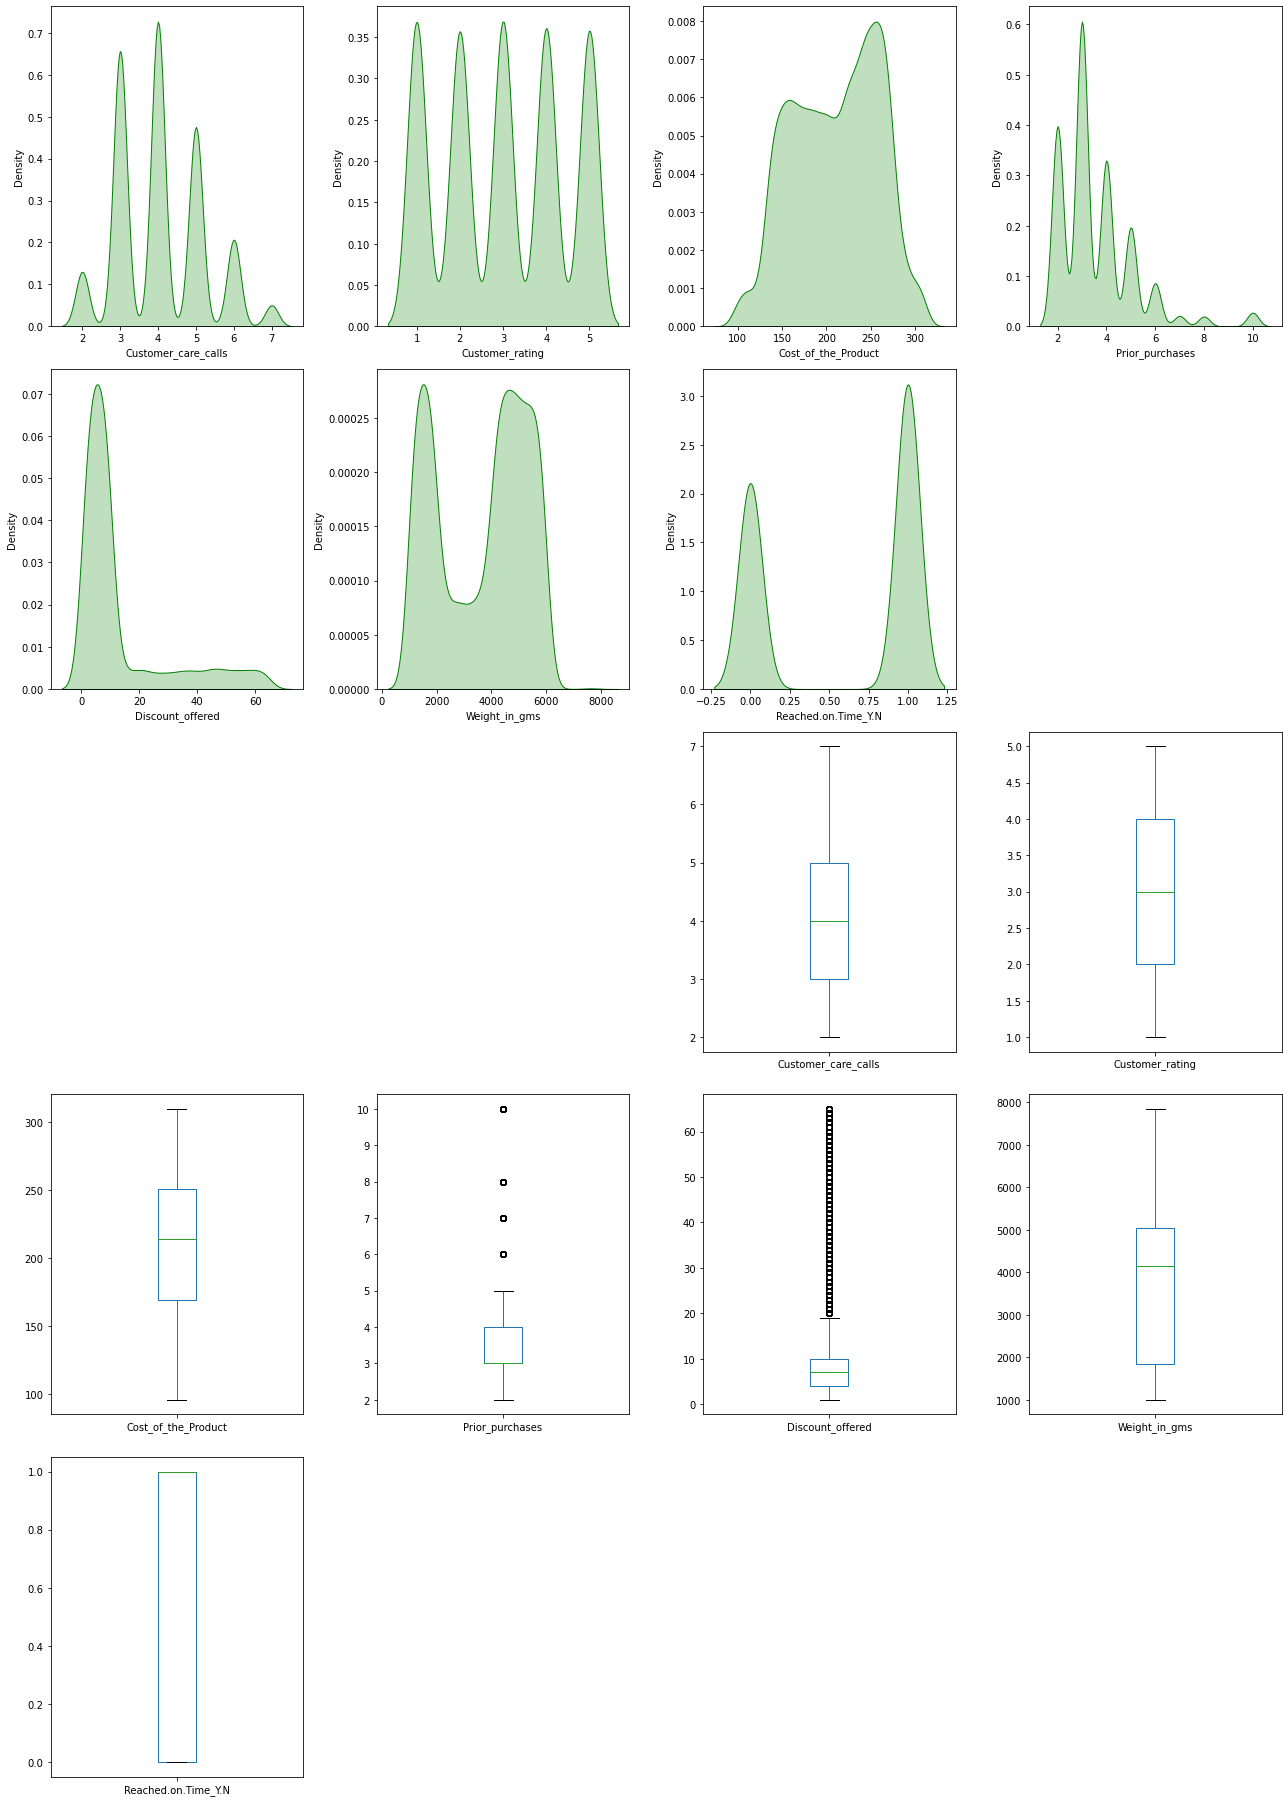

In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(ship1[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    ship1[col].plot.box()
plt.tight_layout() 
plt.show()
 

#### from above we clearly visualize the outliers

### Treating Outliers

In [ ]:
#Removing outlier values from prior purchases column and discount offered column
 
ship1.drop(ship1[(ship1['Prior_purchases'] >5)].index, inplace=True)
 

In [ ]:
ship1

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10992,D,Ship,5,1,236,5,medium,M,3,1906,0
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0


In [ ]:
#saving dataset with new indexing
ship1.to_csv("ship1_new.csv", index = False)

In [ ]:
ship1_new = pd.read_csv("ship1_new.csv")
ship1_new

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
9991,D,Ship,5,1,236,5,medium,M,3,1906,0
9992,A,Ship,4,1,252,5,medium,F,1,1538,1
9993,B,Ship,4,1,232,5,medium,F,6,1247,0
9994,C,Ship,5,4,242,5,low,F,4,1155,0


In [ ]:
#For Discount offered, column we will predict the outlier data using model

In [ ]:
ship1_new['Discount_offered'].value_counts() 

10    782
2     779
6     766
4     762
3     759
     ... 
26     32
65     32
30     30
42     29
25     28
Name: Discount_offered, Length: 65, dtype: int64

In [ ]:
#creating dummy variables to convert categorical data into numerical data
#using one hot encoder
ship1_new = pd.get_dummies(ship1_new, columns = ['Warehouse_block','Mode_of_Shipment','Product_importance']) 

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ship1_new['Gender']= label_encoder.fit_transform(ship1_new['Gender']) 

 ## Instead of removing outliers in discount offer column we make model to predict values for outliers

 ### using linear regression predict values for outliers

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
 
# dividing the data into train and test
#test part is outlier values
#train part is rest data
testdf = ship1_new[ship1_new['Discount_offered']>20]
traindf = ship1_new[ship1_new['Discount_offered']<=20]

traindf1 = traindf.copy()
y = traindf1['Discount_offered'] 
traindf2 = traindf1.drop("Discount_offered",axis=1) 
 

In [ ]:
testdf 

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
7,4,1,233,2,0,48,2804,1,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,3,1,169,3,1,24,1740,1,1,0,0,0,0,0,1,0,1,0,0
2878,6,5,246,4,1,50,3618,1,0,0,1,0,0,0,1,0,0,0,1
2879,4,1,232,3,1,55,2686,1,0,0,0,0,1,0,1,0,0,0,1
2880,3,5,251,3,0,21,2476,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
traindf1

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
5,3,1,162,3,0,12,1417,1,0,0,0,0,1,1,0,0,0,0,1
6,3,4,250,3,0,3,2371,1,0,0,0,1,0,1,0,0,0,1,0
8,3,4,150,3,0,11,1861,1,1,0,0,0,0,1,0,0,0,1,0
10,3,4,189,2,1,12,2888,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,5,1,236,5,1,3,1906,0,0,0,0,1,0,0,0,1,0,0,1
9992,4,1,252,5,0,1,1538,1,1,0,0,0,0,0,0,1,0,0,1
9993,4,1,232,5,0,6,1247,0,0,1,0,0,0,0,0,1,0,0,1
9994,5,4,242,5,0,4,1155,0,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
y

3       10
5       12
6        3
8       11
10      12
        ..
9991     3
9992     1
9993     6
9994     4
9995     6
Name: Discount_offered, Length: 8028, dtype: int64

In [ ]:
traindf2 

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
3,3,3,176,4,1,1177,1,0,1,0,0,0,1,0,0,0,0,1
5,3,1,162,3,0,1417,1,0,0,0,0,1,1,0,0,0,0,1
6,3,4,250,3,0,2371,1,0,0,0,1,0,1,0,0,0,1,0
8,3,4,150,3,0,1861,1,1,0,0,0,0,1,0,0,0,1,0
10,3,4,189,2,1,2888,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,5,1,236,5,1,1906,0,0,0,0,1,0,0,0,1,0,0,1
9992,4,1,252,5,0,1538,1,1,0,0,0,0,0,0,1,0,0,1
9993,4,1,232,5,0,1247,0,0,1,0,0,0,0,0,1,0,0,1
9994,5,4,242,5,0,1155,0,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
#fit the train part of the data into model
lr.fit(traindf2,y)

LinearRegression()

In [ ]:
testdf1 = testdf.copy() 
testdf1
 

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
7,4,1,233,2,0,48,2804,1,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,3,1,169,3,1,24,1740,1,1,0,0,0,0,0,1,0,1,0,0
2878,6,5,246,4,1,50,3618,1,0,0,1,0,0,0,1,0,0,0,1
2879,4,1,232,3,1,55,2686,1,0,0,0,0,1,0,1,0,0,0,1
2880,3,5,251,3,0,21,2476,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
testdf2 = testdf1.drop('Discount_offered', 1)

In [ ]:
testdf2 

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,3374,1,1,0,0,0,0,1,0,0,0,1,0
4,2,2,184,3,0,2484,1,0,0,1,0,0,1,0,0,0,0,1
7,4,1,233,2,0,2804,1,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,3,1,169,3,1,1740,1,1,0,0,0,0,0,1,0,1,0,0
2878,6,5,246,4,1,3618,1,0,0,1,0,0,0,1,0,0,0,1
2879,4,1,232,3,1,2686,1,0,0,0,0,1,0,1,0,0,0,1
2880,3,5,251,3,0,2476,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
#predicting the value of test data
pred = lr.predict(testdf2)
pred

array([8.44222626, 7.61074773, 7.28019897, ..., 7.04754658, 7.38044811,
       8.3743787 ])

In [ ]:
y_test = testdf1['Discount_offered']  

In [ ]:
pred_df= pd.DataFrame({'actual': y_test,
                         'predicted_prob': pred})  

In [ ]:
pred_df 

,actual,predicted_prob
0,44,8.442226
1,59,7.610748
2,48,7.280199
4,46,8.233748
7,48,7.740789
...,...,...
2876,24,7.963007
2878,50,5.476639
2879,55,7.047547
2880,21,7.380448


In [ ]:
#putting the value of predicted value for model formation
testdf1['Discount_offered']= pred

In [ ]:
traindf1['Discount_offered']=y
 

# Logistic Regression model

In [ ]:
y = traindf1['Reached.on.Time_Y.N']
traindf1.drop("Reached.on.Time_Y.N",axis=1,inplace=True)
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(traindf1,y)


LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression()

In [ ]:
y_test = testdf1['Reached.on.Time_Y.N']
testdf1.drop("Reached.on.Time_Y.N",axis=1,inplace=True)
pred = logr.predict(testdf1)


In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(pred,y_test))

0.9334349593495935


# SVM Classification Model 

In [ ]:
from sklearn.svm import SVC   
svm = SVC(kernel='rbf')    
svm.fit(traindf1,y) 

SVC()

In [ ]:
y_pred = svm.predict(testdf1)  

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))  

0.9827235772357723
